In [5]:
# Optimizing parameters for resolution with ZnTe crystal
# Python modules
from importlib import reload as rel;
import matplotlib.pyplot as plt;
import numpy as np;
from scipy.constants import c, epsilon_0;
from scipy.signal import find_peaks;
from time import time;
eps0 = epsilon_0;
#from scipy.interpolate import interp1d;
import sys;
sys.path.insert(0, "../../python");
sys.path.insert(0, "../transverse_resolution/")
sys.path.insert(0, "..\\..\\python");
# Custom modules
from crystal import crystal;
from ebeam import ebeam;
from laser import laser;
import phase_retard as pr;
from plotting import makefig;
import thz;
import vertical_resolution as vr;

In [35]:
# Bunch parameters
################################################################################
Q_drive = 1.5e-9;
Q_wit   = 0.5e-9;
sigz    = 5.2e-6;
sigt    = sigz / c;
del_z   = 150e-6;
del_t   = del_z / c;
N       = 8000;
t_beams = np.linspace(-N * sigt / 2, N * sigt / 2, N);
drive   = ebeam({'Q' : Q_drive, 'sigz' : sigz, 'del_z' : 0, 't' : t_beams});
wit     = ebeam({'Q' : Q_wit, 'sigz' : sigz, 'del_z' : del_z, 't' : t_beams});
################################################################################
# Crystal parameters
ctype = 'ZnTe';
d     = 100e-6;
x     = 1e-2;
y     = 1e-2;
nx    = 1000;
ny    = 1000;
x0    = [4.0e-3, 0.0e-3]
y0    = [2e-3, 0];
x_arr = np.linspace(0, x, nx);
y_arr = np.linspace(-y/2, y/2, ny);
################################################################################
# Probe laser
lambda0 = 800e-9;
dy = 27e-9;
tp = 30e-15;
psi = 45;
psi_rad = psi * np.pi / 180;
probe = laser({'y0' : lambda0, 'dy' : dy, 'tp' : tp})
td    = 6e-12;

In [36]:
g_drive, g_wit, gma = vr.get_2D_signal(drive, wit, probe, psi, ctype, d, x0, x, y0, y, td, sweep = 'horizontal');
ext     = np.array([min(x_arr), max(x_arr), min(y_arr), max(y_arr)]) * 1e3
sig2d   = np.sin(gma / 2)**2

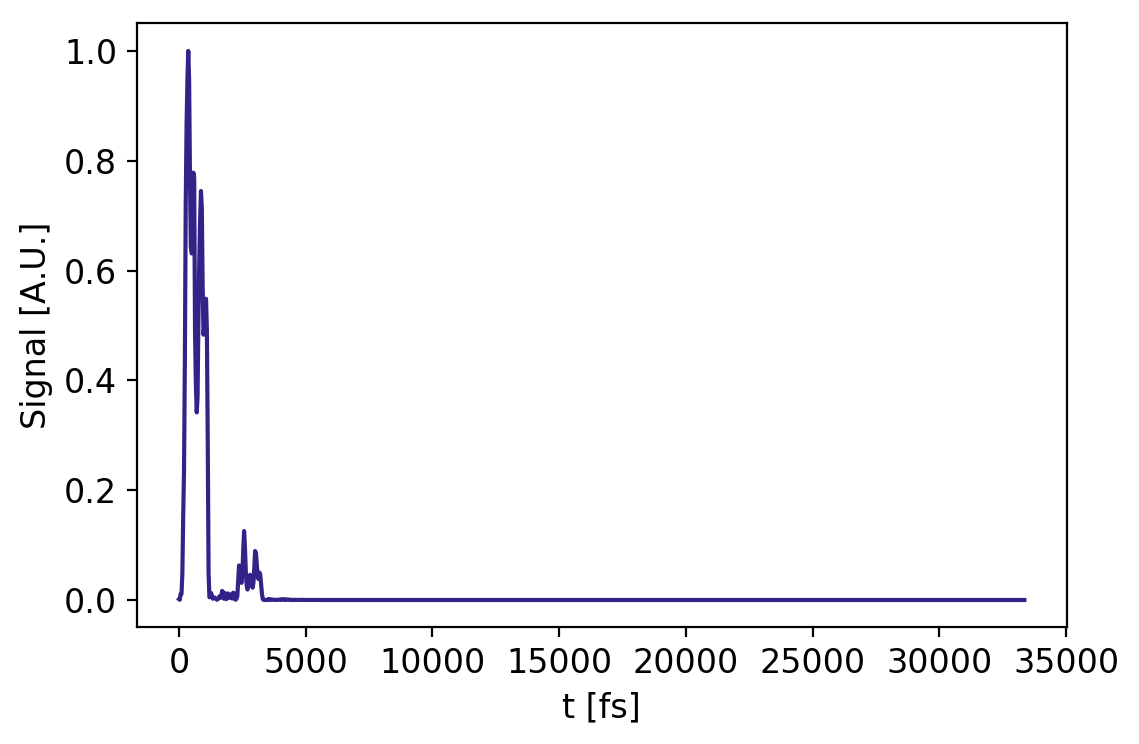

In [37]:
int_sig = np.sum(sig2d, axis = 1);
int_sig = int_sig / max(int_sig);
fig, ax = makefig(xlab = 't [fs]', ylab = 'Signal [A.U.]');
t_plot  = x_arr / c * np.tan(psi_rad) * 1e15;
ax.plot(t_plot, int_sig);

In [11]:
find_peaks(int_sig, height = 0.3)

(array([ 65,  76,  92, 133, 148]),
 {'peak_heights': array([0.99638188, 1.        , 0.38838392, 0.74499147, 0.30002707])})

In [19]:
(int_sig[133] / int_sig[92])

1.918183126801518

0.3883839151100166